# Importation

In [1]:
#!/usr/bin/env python

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import sys,os
from importlib import reload
sys.path.append('..')




#pour la suite, à vous de jouer, bon courage :)

2022-10-17 12:54:25.237528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-17 12:54:25.398966: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-17 12:54:26.330481: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-17 12:54:26.330561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

Pour le putain de TP on va utiliser un dataset mega classique. Qui est mniste. composer de 10 classe qui sont repectivement de 0 a 9 (les chiffre ta vue)
On vq distinguer les separer en deux partie. les jeux de test et les jeux de t'apprentiddage. 

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Il faut normaliser les valeur d'image rentrer. En effet rare sont les reseau de neuronne qui prends en entree des valeur non normaliser et des image avec des taille variable. 
Il coutumier de garder une valeur en puissance de 2 et carrer. On va faire la meme chose.

In [3]:
x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


le but du tp est de realiser un reseau de neuronne de convolution e destination. Il existe de nombreux model disponible de classifieur. Tel que mobilnet, alexnet ect...

In [4]:
print('Avant la normalisation  : Min {} Max {}'.format(x_train.min(),x_train.max()))

Avant la normalisation  : Min 0 Max 255


In [5]:
xmax = x_train.max()
x_train = x_train / xmax
x_test = x_test / xmax

In [6]:
print('Avant la normalisation  : Min {} Max {}'.format(x_train.min(),x_train.max()))

Avant la normalisation  : Min 0.0 Max 1.0


Dans l'amelioration des CNN il est devellopper lords des concours de reseau de neuronnes nottamenet avec le dataset Iamage Net

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Input((28,28,1)))

model.add(keras.layers.Conv2D(8,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(16,(3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


    

2022-10-17 12:54:28.945367: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-17 12:54:28.945409: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (si20): /proc/driver/nvidia/version does not exist
2022-10-17 12:54:28.945713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 100)               4

In [9]:
batch_size = 512
epochs = 16
fit_verbosity = 1

history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = fit_verbosity,
                    validation_data = (x_test, y_test)
)

Epoch 1/16
118/118 [==============================] - 7s 57ms/step - loss: 0.7006 - accuracy: 0.8192 - val_loss: 0.1881 - val_accuracy: 0.9445
Epoch 2/16
118/118 [==============================] - 7s 56ms/step - loss: 0.1485 - accuracy: 0.9557 - val_loss: 0.1050 - val_accuracy: 0.9679
Epoch 3/16
118/118 [==============================] - 5s 45ms/step - loss: 0.1078 - accuracy: 0.9673 - val_loss: 0.0841 - val_accuracy: 0.9738
Epoch 4/16
118/118 [==============================] - 5s 44ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0778 - val_accuracy: 0.9750
Epoch 5/16
118/118 [==============================] - 5s 43ms/step - loss: 0.0800 - accuracy: 0.9750 - val_loss: 0.0720 - val_accuracy: 0.9767
Epoch 6/16
118/118 [==============================] - 5s 44ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0601 - val_accuracy: 0.9808
Epoch 7/16
118/118 [==============================] - 5s 43ms/step - loss: 0.0603 - accuracy: 0.9819 - val_loss: 0.0525 - val_accuracy: 0.9833

In [10]:
score = model.evaluate(x_test, y_test,verbose=0)

print(f'Test loss : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss : 0.0394
Test accuracy : 0.9862


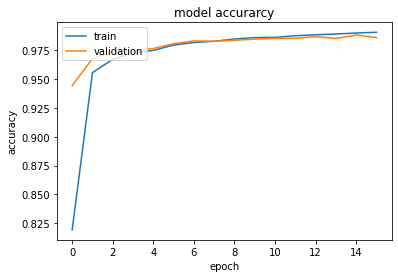

In [11]:
model.metrics_names
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accurarcy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()



 21/313 [=>............................] - ETA: 0s 

/home/e20160018322/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


313/313 [==============================] - 1s 2ms/step


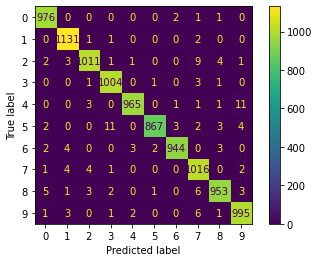

In [12]:
class estimator:
  _estimator_type  = ''
  classes = []
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes = classes
  def predict(self, X):
    y_prob = self.model.predict(X)
    y_pred = y_prob.argmax(axis = 1)
    return y_pred

classes_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
classifier = estimator(model, classes_names)
plot_confusion_matrix(estimator = classifier, X = x_test, y_true = y_test)

In [13]:
model.save('simplConv.h5')